In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/eternity/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Training data (Celsius -> Fahrenheit)
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

print("Input (Celsius):", celsius)
print("Expected Output (Fahrenheit):", fahrenheit)

Input (Celsius): [-40. -10.   0.   8.  15.  22.  38.]
Expected Output (Fahrenheit): [-40.  14.  32.  46.  59.  72. 100.]


In [3]:
# Single-layer model (1 neuron)
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

/Users/eternity/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
print("Training simple model...")
history = model.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Training complete!")

Training simple model...
Training complete!


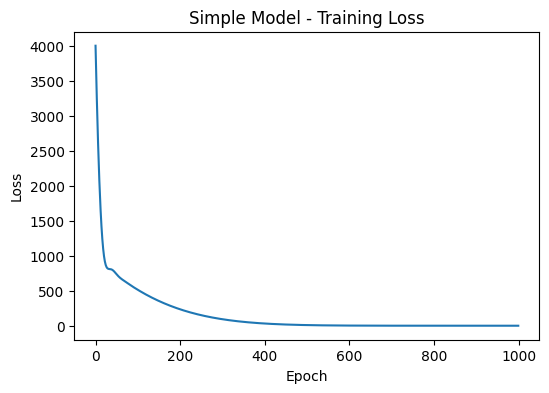

In [5]:
plt.figure(figsize=(6, 4))
plt.title("Simple Model - Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.show()

In [6]:
prediction = model.predict(np.array([100.0]).reshape(-1, 1))
print(f"100°C → {prediction[0][0]:.2f}°F (Expected: 212°F)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
100°C → 211.74°F (Expected: 212°F)


In [7]:
weight, bias = layer.get_weights()
print(f"Weight: {weight[0][0]:.4f} (Expected ~1.8)")
print(f"Bias: {bias[0]:.4f} (Expected ~32)")

Weight: 1.7982 (Expected ~1.8)
Bias: 31.9190 (Expected ~32)


In [8]:
# Multi-layer model
hidden1 = tf.keras.layers.Dense(units=3, input_shape=[1])
hidden2 = tf.keras.layers.Dense(units=3)
output = tf.keras.layers.Dense(units=1)

complex_model = tf.keras.Sequential([hidden1, hidden2, output])

complex_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [9]:
print("Training complex model...")
complex_history = complex_model.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Training complete!")

Training complex model...
Training complete!


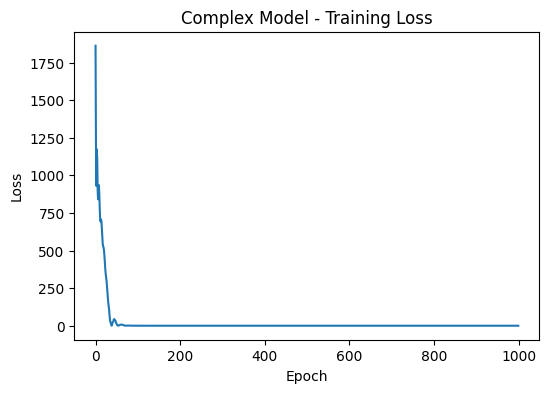

In [10]:
plt.figure(figsize=(6, 4))
plt.title("Complex Model - Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(complex_history.history["loss"])
plt.show()

In [11]:
complex_prediction = complex_model.predict(np.array([100.0]).reshape(-1, 1))
print(f"100°C → {complex_prediction[0][0]:.2f}°F (Expected: 212°F)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
100°C → 211.75°F (Expected: 212°F)


In [12]:
print("\nHidden Layer 1 Weights & Bias:")
print("Weights:", hidden1.get_weights()[0])
print("Bias:", hidden1.get_weights()[1])

print("\nHidden Layer 2 Weights & Bias:")
print("Weights:", hidden2.get_weights()[0])
print("Bias:", hidden2.get_weights()[1])

print("\nOutput Layer Weights & Bias:")
print("Weights:", output.get_weights()[0])
print("Bias:", output.get_weights()[1][0])


Hidden Layer 1 Weights & Bias:
Weights: [[-0.13918738 -0.03820707  0.83555055]]
Bias: [-3.637394  -3.7636755  3.8345282]

Hidden Layer 2 Weights & Bias:
Weights: [[ 1.3507295   0.00451628  0.8033103 ]
 [ 1.7212129  -0.34940666 -0.9036884 ]
 [-1.2661892   0.4424084   0.04522729]]
Bias: [-3.8536322  3.7773724  1.5837784]

Output Layer Weights & Bias:
Weights: [[-1.2349019 ]
 [ 0.47648007]
 [ 0.10396123]]
Bias: 3.6714532


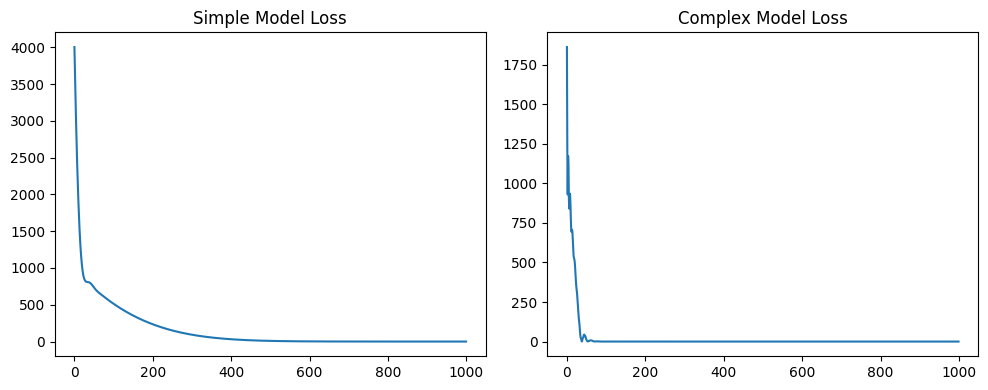

In [13]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Simple Model Loss")
plt.plot(history.history["loss"])

plt.subplot(1, 2, 2)
plt.title("Complex Model Loss")
plt.plot(complex_history.history["loss"])

plt.tight_layout()
plt.show()